## Labb 2

In [4]:
#Impprting useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os


In [5]:
#Reading the excel file and returning a list with the sheet names
excel_file = (pd.ExcelFile("riket2023_åk9_np.xlsx", engine="openpyxl")) 
print(type(excel_file.sheet_names))
print(excel_file.sheet_names)

<class 'list'>
['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk', 'Rapportbeskrivning och def.']


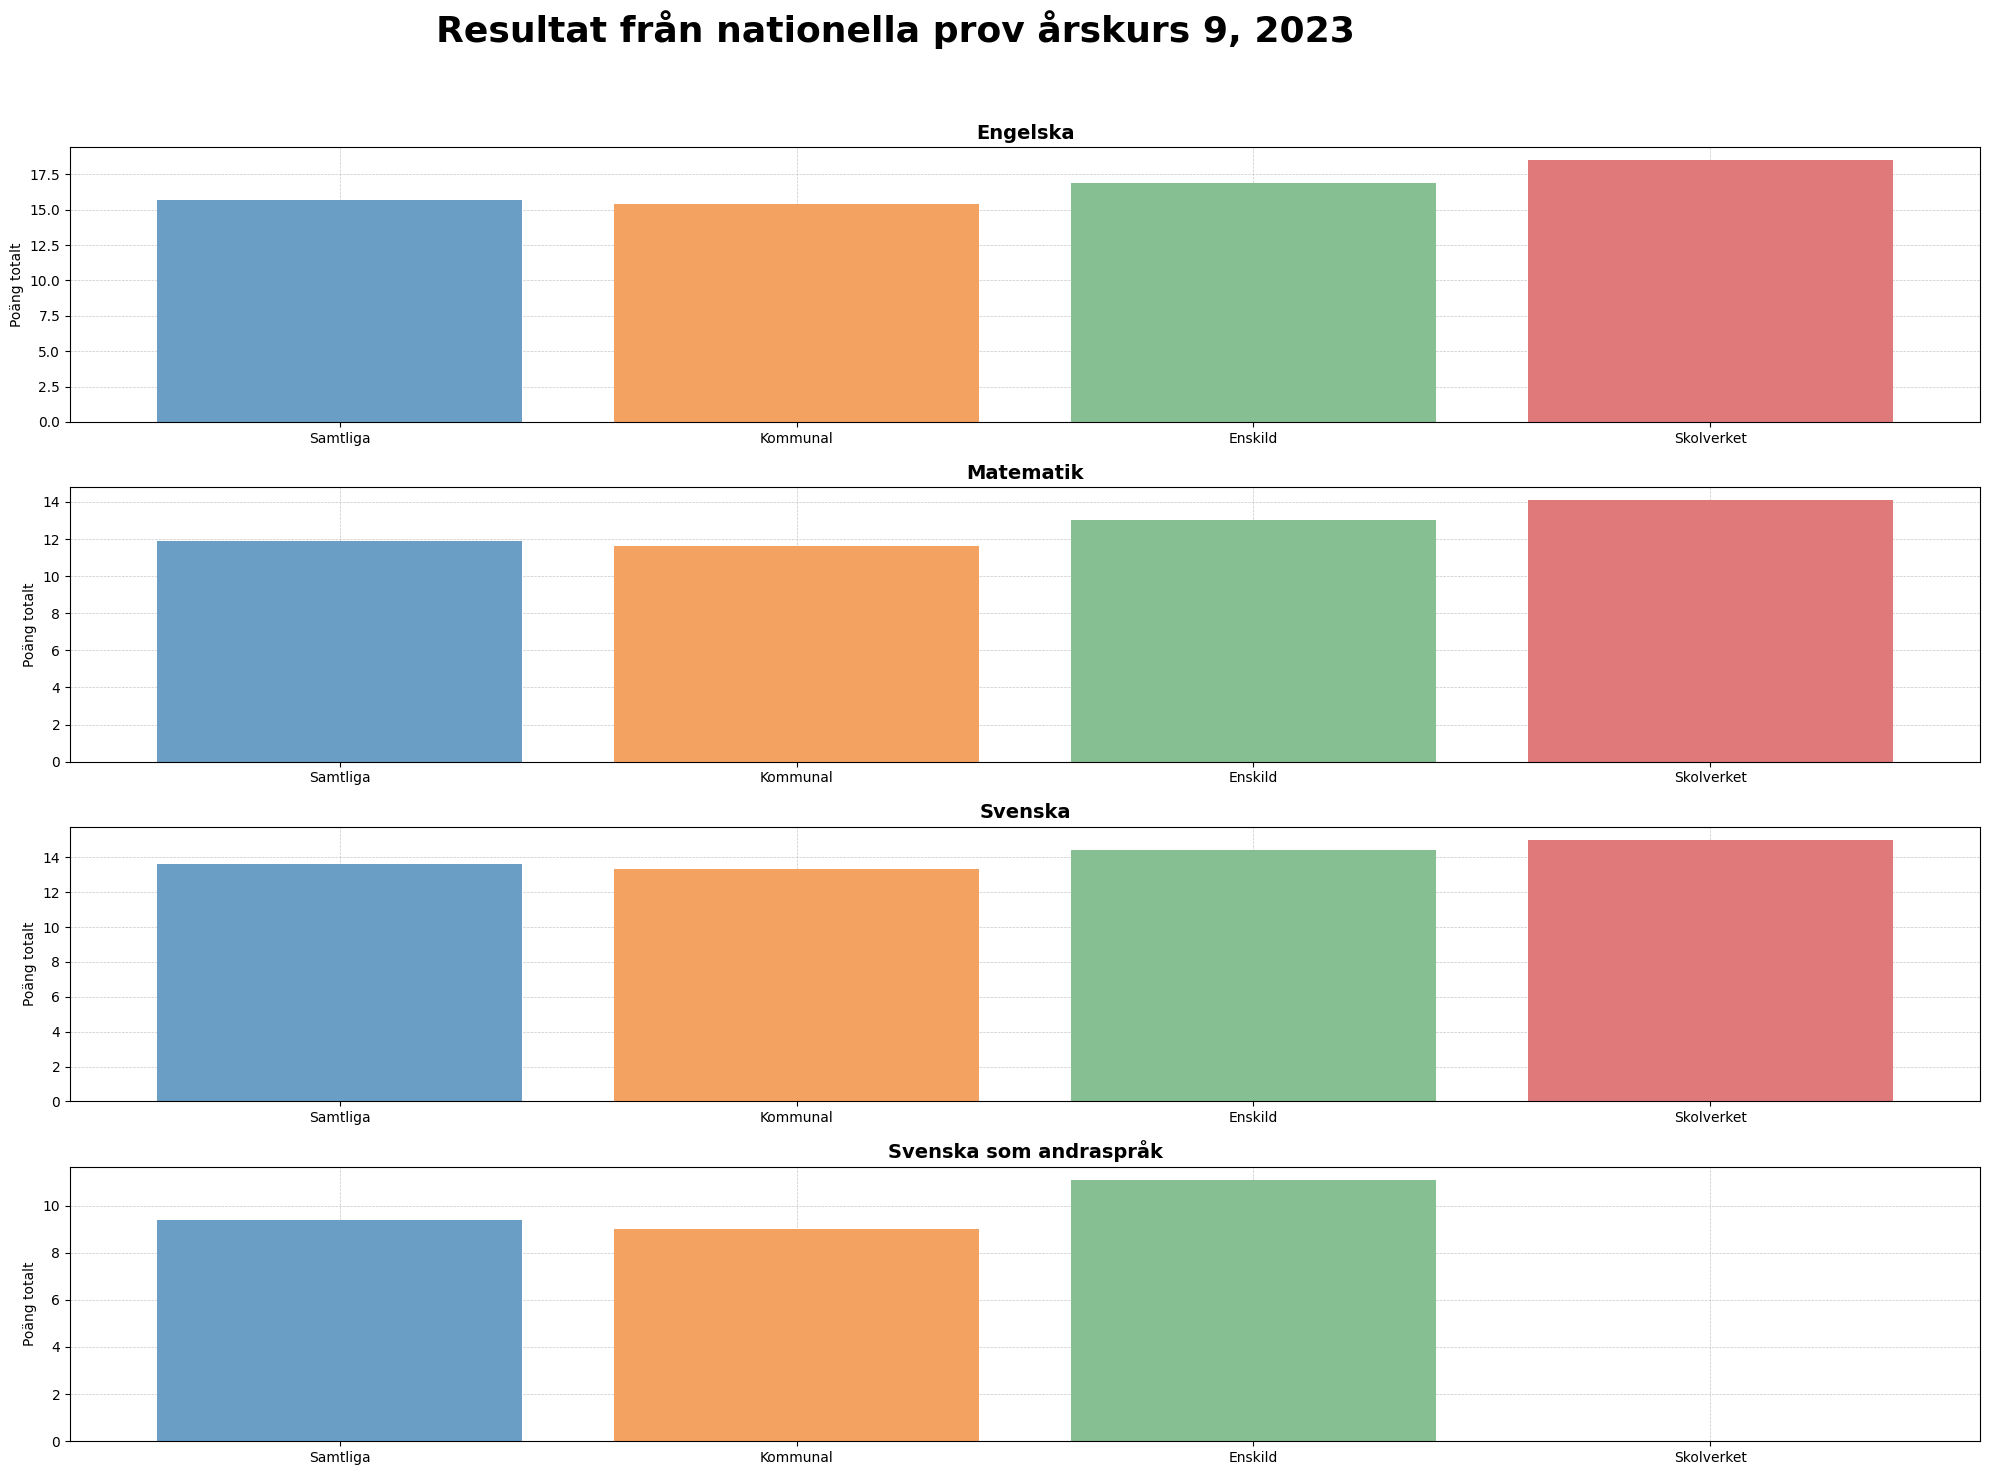

In [14]:
# reading the Excel file and creating a dict with the sheet-name as key and the value as pandas dataframe
sheets = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name=None, engine="openpyxl", header=None)

# List with new column names
new_column_names = [
    "Plats", "Huvudman",
    "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)",
    "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)",
    "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"
]

for sheet_name, df in sheets.items():
    # use row 9 (index 8) as the new column names
    df.columns = df.iloc[8]

    # remove all rows up to and including row 9 (index 8)
    df = df.iloc[9:].reset_index(drop=True)

    # rename columns from my new_column_names list
    if len(df.columns) == len(new_column_names):
        df.columns = new_column_names

    # Saving the updated dict to the old
    sheets[sheet_name] = df
        
    '''
    print to check if everything is correct
    df_engelska = sheets["Engelska"]
    print(df.head())
    print(df_engelska)
    '''

#Number of sheets
num_sheets = len(sheets)
fig, axes = plt.subplots(num_sheets -1, 1, figsize=(20, num_sheets * 3)) #creating subplots

plt.suptitle("Resultat från nationella prov årskurs 9, 2023", fontsize=26, fontweight="bold", x = 0.45,y=0.98)

header_color = "#DDDDDD"
# Iterate through every sheet and adding a subplot for each
for ax, (sheet_name, df) in zip(axes, sheets.items()):#Adding gridlines
    ax.set_axisbelow(True)#Make sure gridlines are behind the bars
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7) #
    df = df[["Huvudman", "Totalt (poäng)"]].dropna() #Extract necessary columns

    df["Totalt (poäng)"] = pd.to_numeric(df["Totalt (poäng)"], errors="coerce") #Take column 'Totalt (poäng)', change all the datatypes to numeric. If it cant do it, set it to NaN

    ax.bar(df["Huvudman"], df["Totalt (poäng)"], color=["#6a9ec5", "#f4a261", "#86bf91", "#e07a7a"])


    ax.set_title(sheet_name, fontsize = 14, fontweight = "bold")
    ax.set_ylabel("Poäng totalt")
    

    
plt.savefig("Visualiseringar/resultat_nationella_prov_2023_stapeldiagram.png", dpi=300, bbox_inches="tight")

plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.show()
    
